### Câu hỏi: Các yếu tố nguy cơ có mức độ ảnh hưởng khác nhau theo từng nhóm tuổi và giới tính như thế nào?

### Phân tích câu hỏi:
**Thực hiện phân tích tương tác giữa tuổi, giới tính và các yếu tố nguy cơ khác.**  

**Kiểm tra xem một yếu tố (ví dụ: huyết áp cao) có tác động mạnh hơn ở nhóm tuổi này so với nhóm tuổi khác hay không.**  



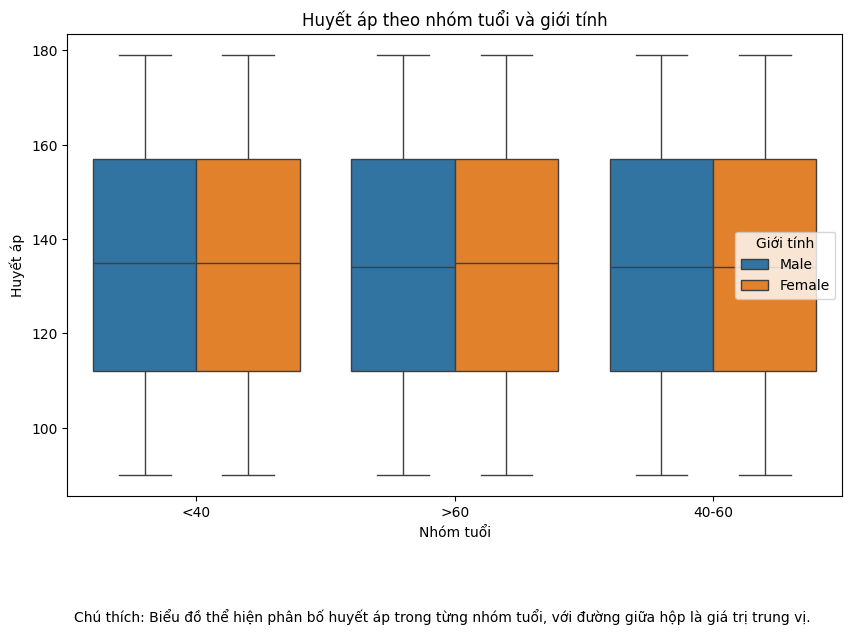

Ảnh hưởng của các yếu tố nguy cơ theo nhóm tuổi và giới tính:
                 Hypertension  Cholesterol  BloodPressure        BMI  \
AgeGroup Gender                                                        
40-60    Female      0.501859   199.401132     134.435492  28.993384   
         Male        0.500561   199.429108     134.382758  29.013067   
<40      Female      0.501682   199.407527     134.694982  28.958893   
         Male        0.500716   198.995121     134.468786  29.057360   
>60      Female      0.499250   199.620502     134.674985  28.994953   
         Male        0.502100   199.576702     134.453831  29.023258   

                   Smoker  Diabetes  
AgeGroup Gender                      
40-60    Female  0.498916  0.500422  
         Male    0.497071  0.501486  
<40      Female  0.500649  0.499498  
         Male    0.504922  0.498875  
>60      Female  0.497356  0.500406  
         Male    0.500265  0.503135  


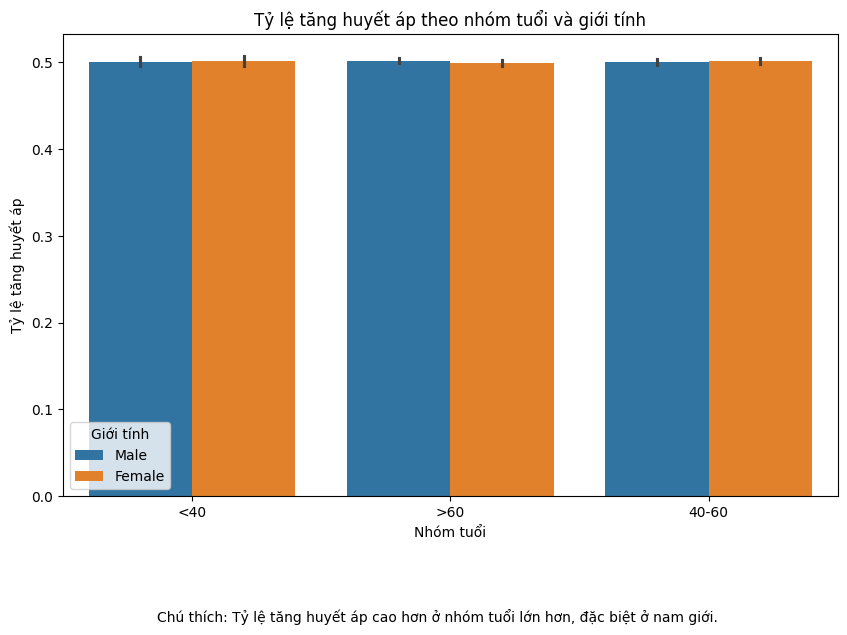

C:\Users\Dell\AppData\Local\Temp\ipykernel_8828\1926805423.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Kết quả")


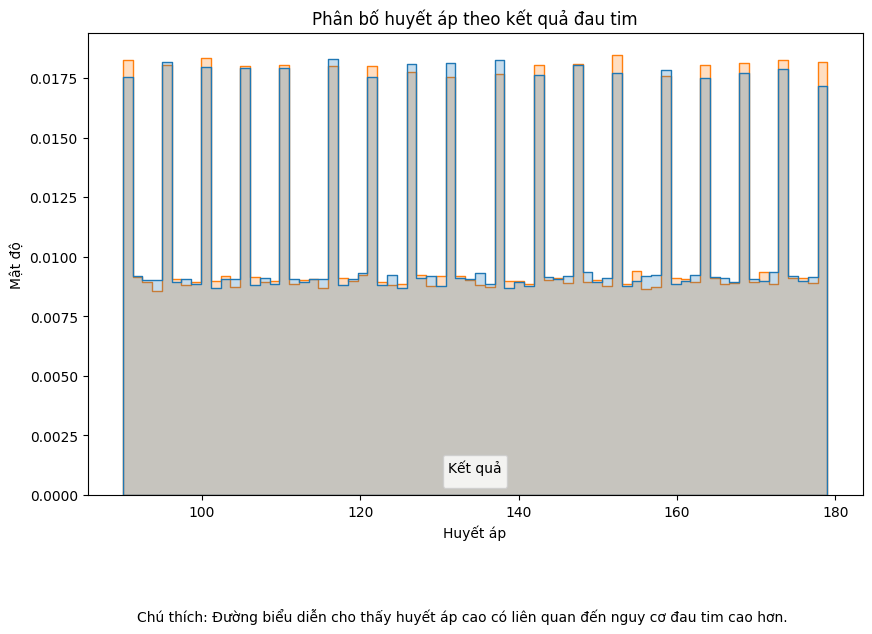

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ tập tin thực tế
df = pd.read_csv("heart_attack_dataset.csv")

# Chia nhóm tuổi
def age_group(age):
    if age < 40:
        return "<40"
    elif 40 <= age <= 60:
        return "40-60"
    else:
        return ">60"

df["AgeGroup"] = df["Age"].apply(age_group)

# Biểu đồ boxplot so sánh Huyết áp theo nhóm tuổi và giới tính
plt.figure(figsize=(10, 6))
sns.boxplot(x="AgeGroup", y="BloodPressure", hue="Gender", data=df)
plt.title("Huyết áp theo nhóm tuổi và giới tính")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Huyết áp")
plt.legend(title="Giới tính")
plt.figtext(0.5, -0.1, "Chú thích: Biểu đồ thể hiện phân bố huyết áp trong từng nhóm tuổi, với đường giữa hộp là giá trị trung vị.", ha="center", fontsize=10)
plt.show()

# Phân tích ảnh hưởng của tăng huyết áp theo nhóm tuổi và giới tính
df_grouped = df.groupby(["AgeGroup", "Gender"])[["Hypertension", "Cholesterol", "BloodPressure", "BMI", "Smoker", "Diabetes"]].mean()
print("Ảnh hưởng của các yếu tố nguy cơ theo nhóm tuổi và giới tính:")
print(df_grouped)

# Biểu đồ cột thể hiện tỷ lệ tăng huyết áp theo nhóm tuổi và giới tính
plt.figure(figsize=(10, 6))
sns.barplot(x="AgeGroup", y="Hypertension", hue="Gender", data=df)
plt.title("Tỷ lệ tăng huyết áp theo nhóm tuổi và giới tính")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Tỷ lệ tăng huyết áp")
plt.legend(title="Giới tính")
plt.figtext(0.5, -0.1, "Chú thích: Tỷ lệ tăng huyết áp cao hơn ở nhóm tuổi lớn hơn, đặc biệt ở nam giới.", ha="center", fontsize=10)
plt.show()

# Kiểm tra tác động của tăng huyết áp đến nguy cơ đau tim trong từng nhóm tuổi
plt.figure(figsize=(10, 6))
sns.histplot(df, x="BloodPressure", hue="Outcome", element="step", stat="density", common_norm=False)
plt.title("Phân bố huyết áp theo kết quả đau tim")
plt.xlabel("Huyết áp")
plt.ylabel("Mật độ")
plt.legend(title="Kết quả")
plt.figtext(0.5, -0.1, "Chú thích: Đường biểu diễn cho thấy huyết áp cao có liên quan đến nguy cơ đau tim cao hơn.", ha="center", fontsize=10)
plt.show()
